In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage import io
import cv2 as cv

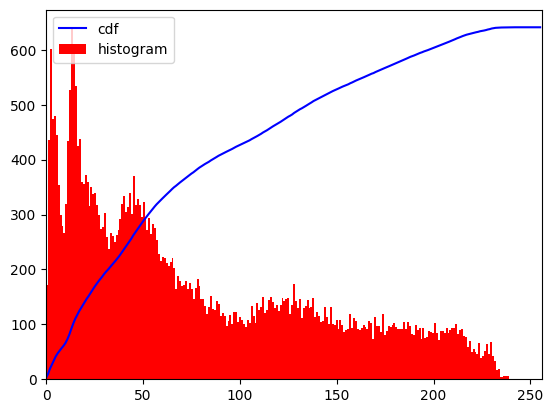

In [2]:
img = cv.imread("list.jpg", cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

hist, bins = np.histogram(img.flatten(), 256, [0, 255])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color="b")
plt.hist(img.flatten(), 256, [0, 255], color="r")
plt.xlim([0, 256])
plt.legend(("cdf", "histogram"), loc="upper left")
plt.show()

In [3]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype("uint8")
cdf_normalized = cdf * float(hist.max()) / cdf.max()

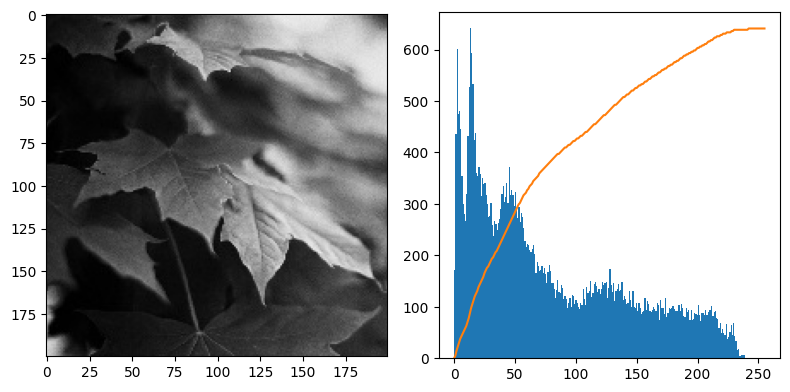

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax = ax.ravel()
ax[0].imshow(img, cmap="gray", vmin=0, vmax=255)
ax[1].hist(img.ravel(), 256, [0, 255])
ax[1].plot(cdf_normalized)
fig.tight_layout()
plt.show()

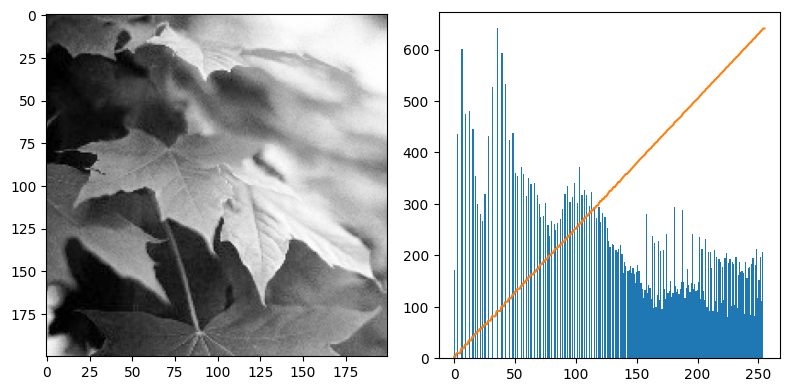

In [5]:
img2 = cdf[img]

hist2, bins2 = np.histogram(img2.flatten(), 256, [0, 255])

cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * float(hist2.max()) / cdf2.max()

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax = ax.ravel()
ax[0].imshow(img2, cmap="gray", vmin=0, vmax=255)
ax[1].hist(img2.ravel(), 256, [0, 255])
ax[1].plot(cdf_normalized2)
fig.tight_layout()
plt.show()

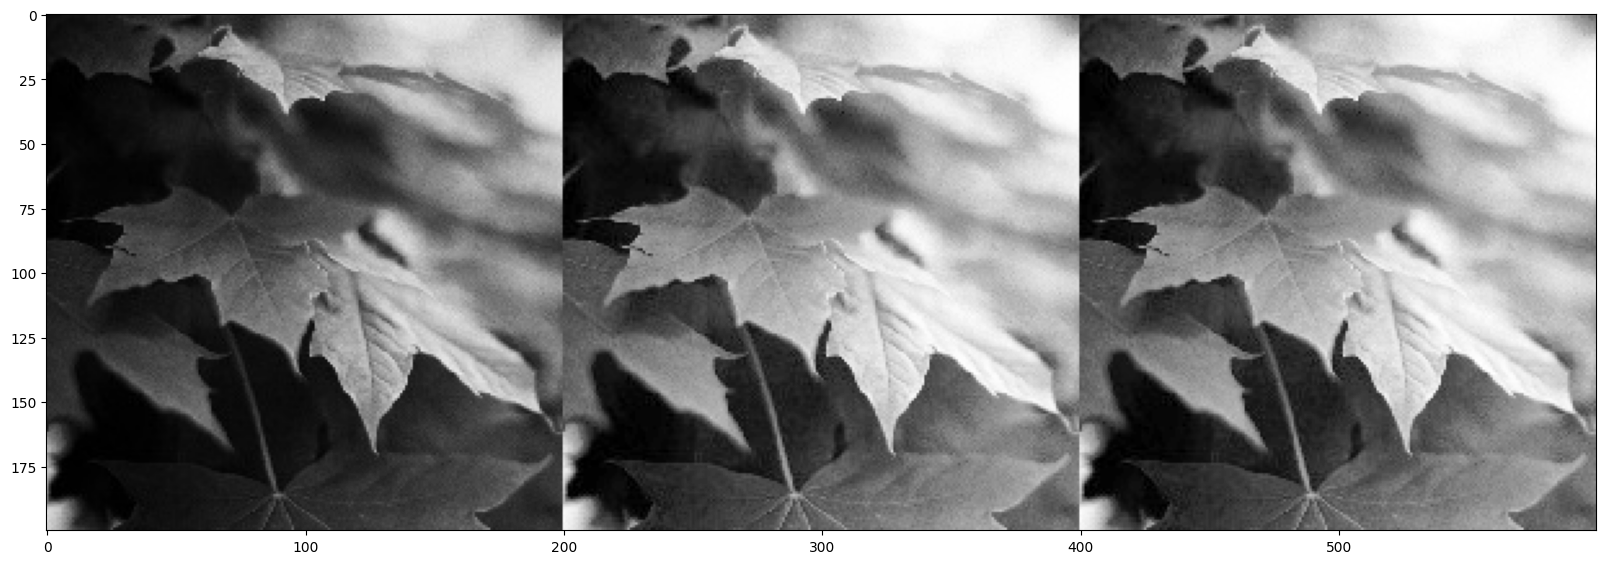

In [6]:
equ = cv.equalizeHist(img)
res = np.hstack((img, img2, equ))  # stacking images side-by-side

plt.figure(figsize=(20, 20))
plt.imshow(res, cmap='gray', vmax=255, vmin=0)
plt.show()

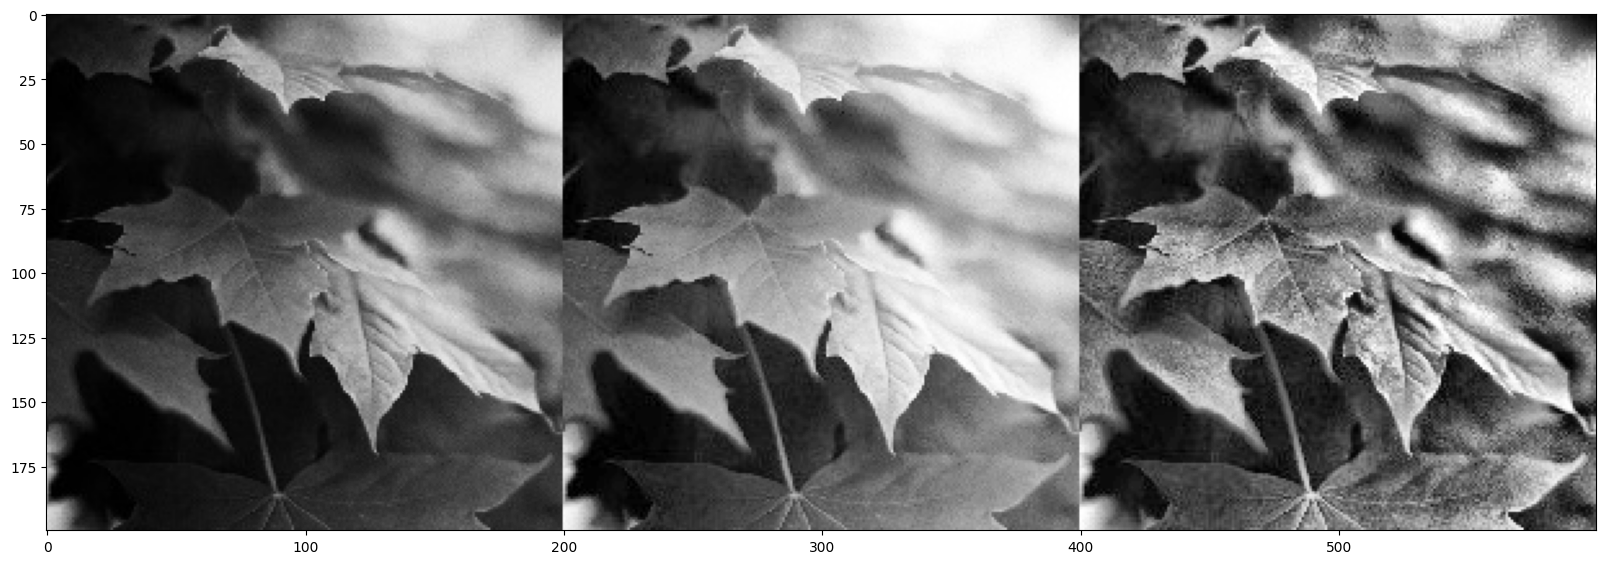

In [7]:
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
plt.figure(figsize=(20, 20))
res = np.hstack((img, equ, cl1))
plt.imshow(res, cmap='gray', vmax=255, vmin=0)
plt.show()

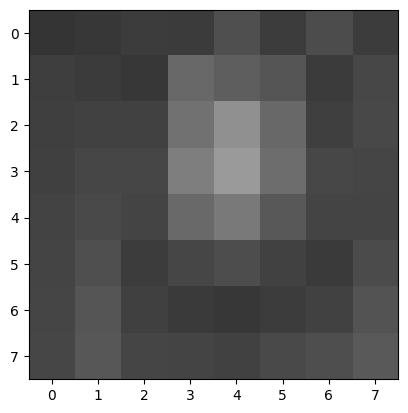

In [8]:
test_img = [
    [52, 55, 61, 59, 79, 61, 76, 61],
    [62, 59, 55, 104, 94, 85, 59, 71],
    [63, 65, 66, 113, 144, 104, 63, 72],
    [64, 70, 70, 126, 154, 109, 71, 69],
    [67, 73, 68, 106, 122, 88, 68, 68],
    [68, 79, 60, 70, 77, 66, 58, 75],
    [69, 85, 64, 58, 55, 61, 65, 83],
    [70, 87, 69, 68, 65, 73, 78, 90],
]

test_img = np.array(test_img)

plt.imshow(test_img, cmap="gray", vmin=0, vmax=255)

plt.show()